In [42]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import sys 

sys.path.append('src')

from src.importrhdutilities import load_file

A_active_channel_names = [
    f'A-0{channel_index:02d}' 
        for channel_index in [23, 7, 22, 6, 21, 5, 20, 4, 19, 3, 18, 2, 17, 1, 16, 0, 15, 31, 14, 30, 13, 29, 12, 28, 11, 27, 10, 26, 9, 25, 8, 24]
]
B_active_channel_names = [
    f'B-0{channel_index:02d}' 
        for channel_index in [0, 15, 1, 14, 2, 13, 3, 12] + [4, 11, 5, 10, 6, 9, 7, 8]
]
C_active_channel_names = [
    f'C-0{channel_index:02d}' 
        for channel_index in [17, 46, 19, 44, 21, 42, 23, 40, 25, 38, 27, 36, 29, 34, 31, 32, 33, 30, 35, 28, 37, 26, 39, 24, 41, 22, 43, 20, 45, 18, 47, 16]
]

active_channel_names = A_active_channel_names + B_active_channel_names + C_active_channel_names

channel_indices = np.array([
    [ 0,  1,  2,  3,  7,  6,  5,  4],
    [ 8,  9, 10, 11, 15, 14, 13, 12],
    [16, 17, 18, 19, 23, 22, 21, 20],
    [24, 25, 26, 27, 31, 30, 29, 28],
    [32, 33, 34, 35, 39, 38, 37, 36],
    [40, 41, 42, 43, 47, 46, 45, 44],
    [48, 49, 50, 51, 55, 54, 53, 52],
    [56, 57, 58, 59, 63, 62, 61, 60],
    [64, 65, 66, 67, 71, 70, 69, 68],
    [72, 73, 74, 75, 79, 78, 77, 76],
])
n_s_per_min = 60
n_ms_per_s = 1000


Reading data/raw/240319_01_pbs_injection/D13_4_01_1156am_240319_115651-before_pbs/D13_4_1156am_240319_120252.rhd
Found 80 amplifier channels.
Found 9 auxiliary input channels.
File contains 60.002 seconds of data.  Amplifiers were sampled at 30.00 kS/s.
No missing timestamps in data.

Reading data/raw/240319_01_pbs_injection/D13_4_02_1156am_240319_115651-after_pbs/D13_4_1156am_240319_120852.rhd
Found 80 amplifier channels.
Found 9 auxiliary input channels.
File contains 60.002 seconds of data.  Amplifiers were sampled at 30.00 kS/s.
No missing timestamps in data.

Reading data/raw/240319_02_cocaine_injection/D13_4_03_1736_240319_174110-before_cocaine/D13_4_1736_240319_174110.rhd
Found 80 amplifier channels.
Found 9 auxiliary input channels.
File contains 60.002 seconds of data.  Amplifiers were sampled at 30.00 kS/s.
No missing timestamps in data.

Reading data/raw/240319_02_cocaine_injection/D13_4_04_1736_240319_174110-after_cocaine/D13_4_1736_240319_180010.rhd
Found 80 amplifier chan

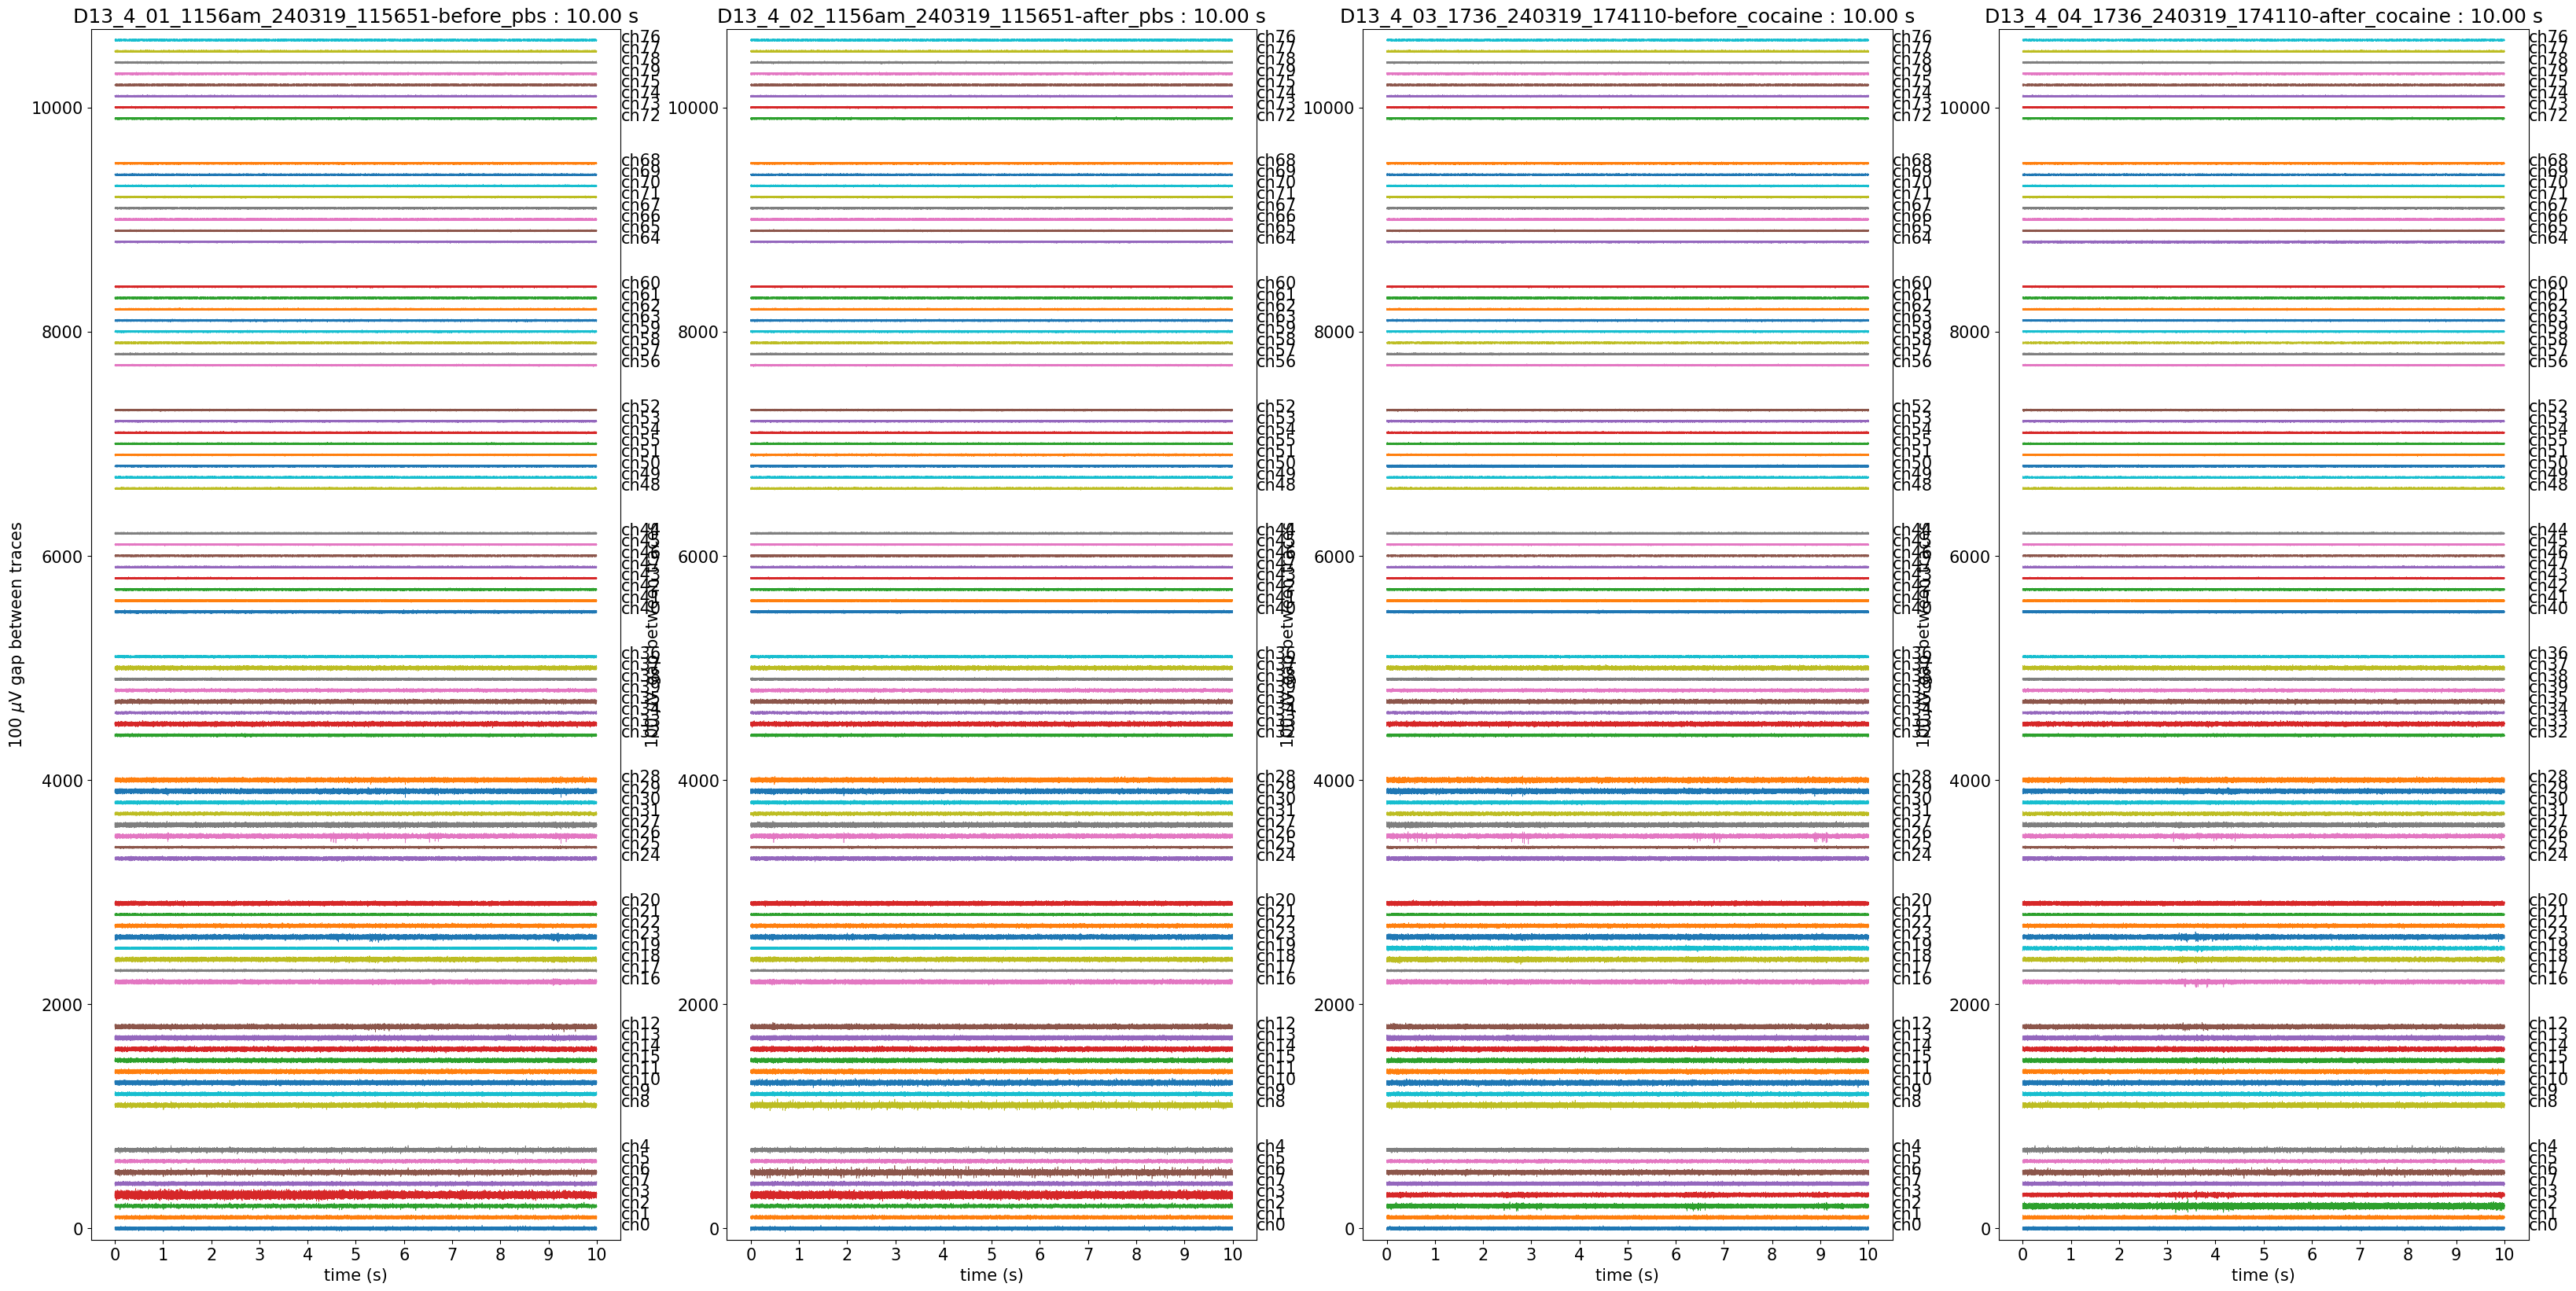

In [77]:
trace_gap = 100
shank_gap = trace_gap * 3
fontsize = 15

segments = [
    ('data/raw/240319_01_pbs_injection/D13_4_01_1156am_240319_115651-before_pbs', 6, (0, 10)),
    ('data/raw/240319_01_pbs_injection/D13_4_02_1156am_240319_115651-after_pbs', 0, (20, 30)),
    ('data/raw/240319_02_cocaine_injection/D13_4_03_1736_240319_174110-before_cocaine', 0, (20, 30)),
    ('data/raw/240319_02_cocaine_injection/D13_4_04_1736_240319_174110-after_cocaine', 7, (50, 60)),
]

plt.figure(figsize=(40, 20))
plt.rcParams.update({'font.size': 15})
for plot_index, (segment_path, file_index, (plot_start_s, plot_end_s)) in enumerate(segments):
    ax = plt.subplot(1, len(segments), plot_index + 1)
    recording_paths = sorted(glob.glob(f'{segment_path}/*.rhd'))

    recording_path = recording_paths[file_index]
    
    raw_data, data_present = load_file(recording_path)

    if data_present:
        recording_channel_names = [channel_info['native_channel_name'] for channel_info in raw_data['amplifier_channels']]
        sampling_frequency = raw_data['frequency_parameters']['amplifier_sample_rate']
        active_channel_indices = [recording_channel_names.index(active_channel_name) for active_channel_name in active_channel_names]
        traces = raw_data['amplifier_data'][active_channel_indices]

        plotted_traces = traces[:, int(plot_start_s * sampling_frequency) : int(plot_end_s * sampling_frequency)]
        n_shank, n_channel_per_shank = channel_indices.shape
        n_channel = channel_indices.size
        duration = plotted_traces.shape[1] / sampling_frequency 
        ax.set_title(f'{segment_path.split("/")[-1]} : {duration:0.2f} s')

        for shank_i, shank in enumerate(channel_indices):
            for channel_i, channel in enumerate(shank):
                y_baseline = trace_gap * (channel_i + shank_i * n_channel_per_shank) + shank_gap * shank_i
                
                ax.plot(plotted_traces[channel]+y_baseline, linewidth=0.5)
                ax.text(len(plotted_traces[channel])+15000, y_baseline - fontsize, f'ch{channel}')

        xticks_labels = list(range(round(duration) + 1))
        xticks_locs = [minute * sampling_frequency for minute in xticks_labels]
        ax.set_ylim(-trace_gap, n_channel * trace_gap + (n_shank - 1) * shank_gap)
        ax.set_xticks(ticks=xticks_locs, labels=xticks_labels)
        ax.set_xlabel('time (s)')
        ax.set_ylabel(rf'{trace_gap} $\mu$V gap between traces')
plt.savefig('data/processed/D13_4.pdf', bbox_inches='tight')
plt.show()
plt.close()

data/raw/240319_01_pbs_injection/D14_6_01_240319_123455-before_pbs
10
Reading data/raw/240319_01_pbs_injection/D14_6_01_240319_123455-before_pbs/D14_6_240319_124055.rhd
Found 80 amplifier channels.
Found 9 auxiliary input channels.
File contains 60.002 seconds of data.  Amplifiers were sampled at 30.00 kS/s.
No missing timestamps in data.

data/raw/240319_01_pbs_injection/D14_6_02_240319_123455-after_pbs
10
Reading data/raw/240319_01_pbs_injection/D14_6_02_240319_123455-after_pbs/D14_6_240319_125555.rhd
Found 80 amplifier channels.
Found 9 auxiliary input channels.
File contains 60.002 seconds of data.  Amplifiers were sampled at 30.00 kS/s.
No missing timestamps in data.

data/raw/240319_02_cocaine_injection/D14_6_03_1826_240319_183034-before_cocaine
10
Reading data/raw/240319_02_cocaine_injection/D14_6_03_1826_240319_183034-before_cocaine/D14_6_1826_240319_183834.rhd
Found 80 amplifier channels.
Found 9 auxiliary input channels.
File contains 60.002 seconds of data.  Amplifiers were 

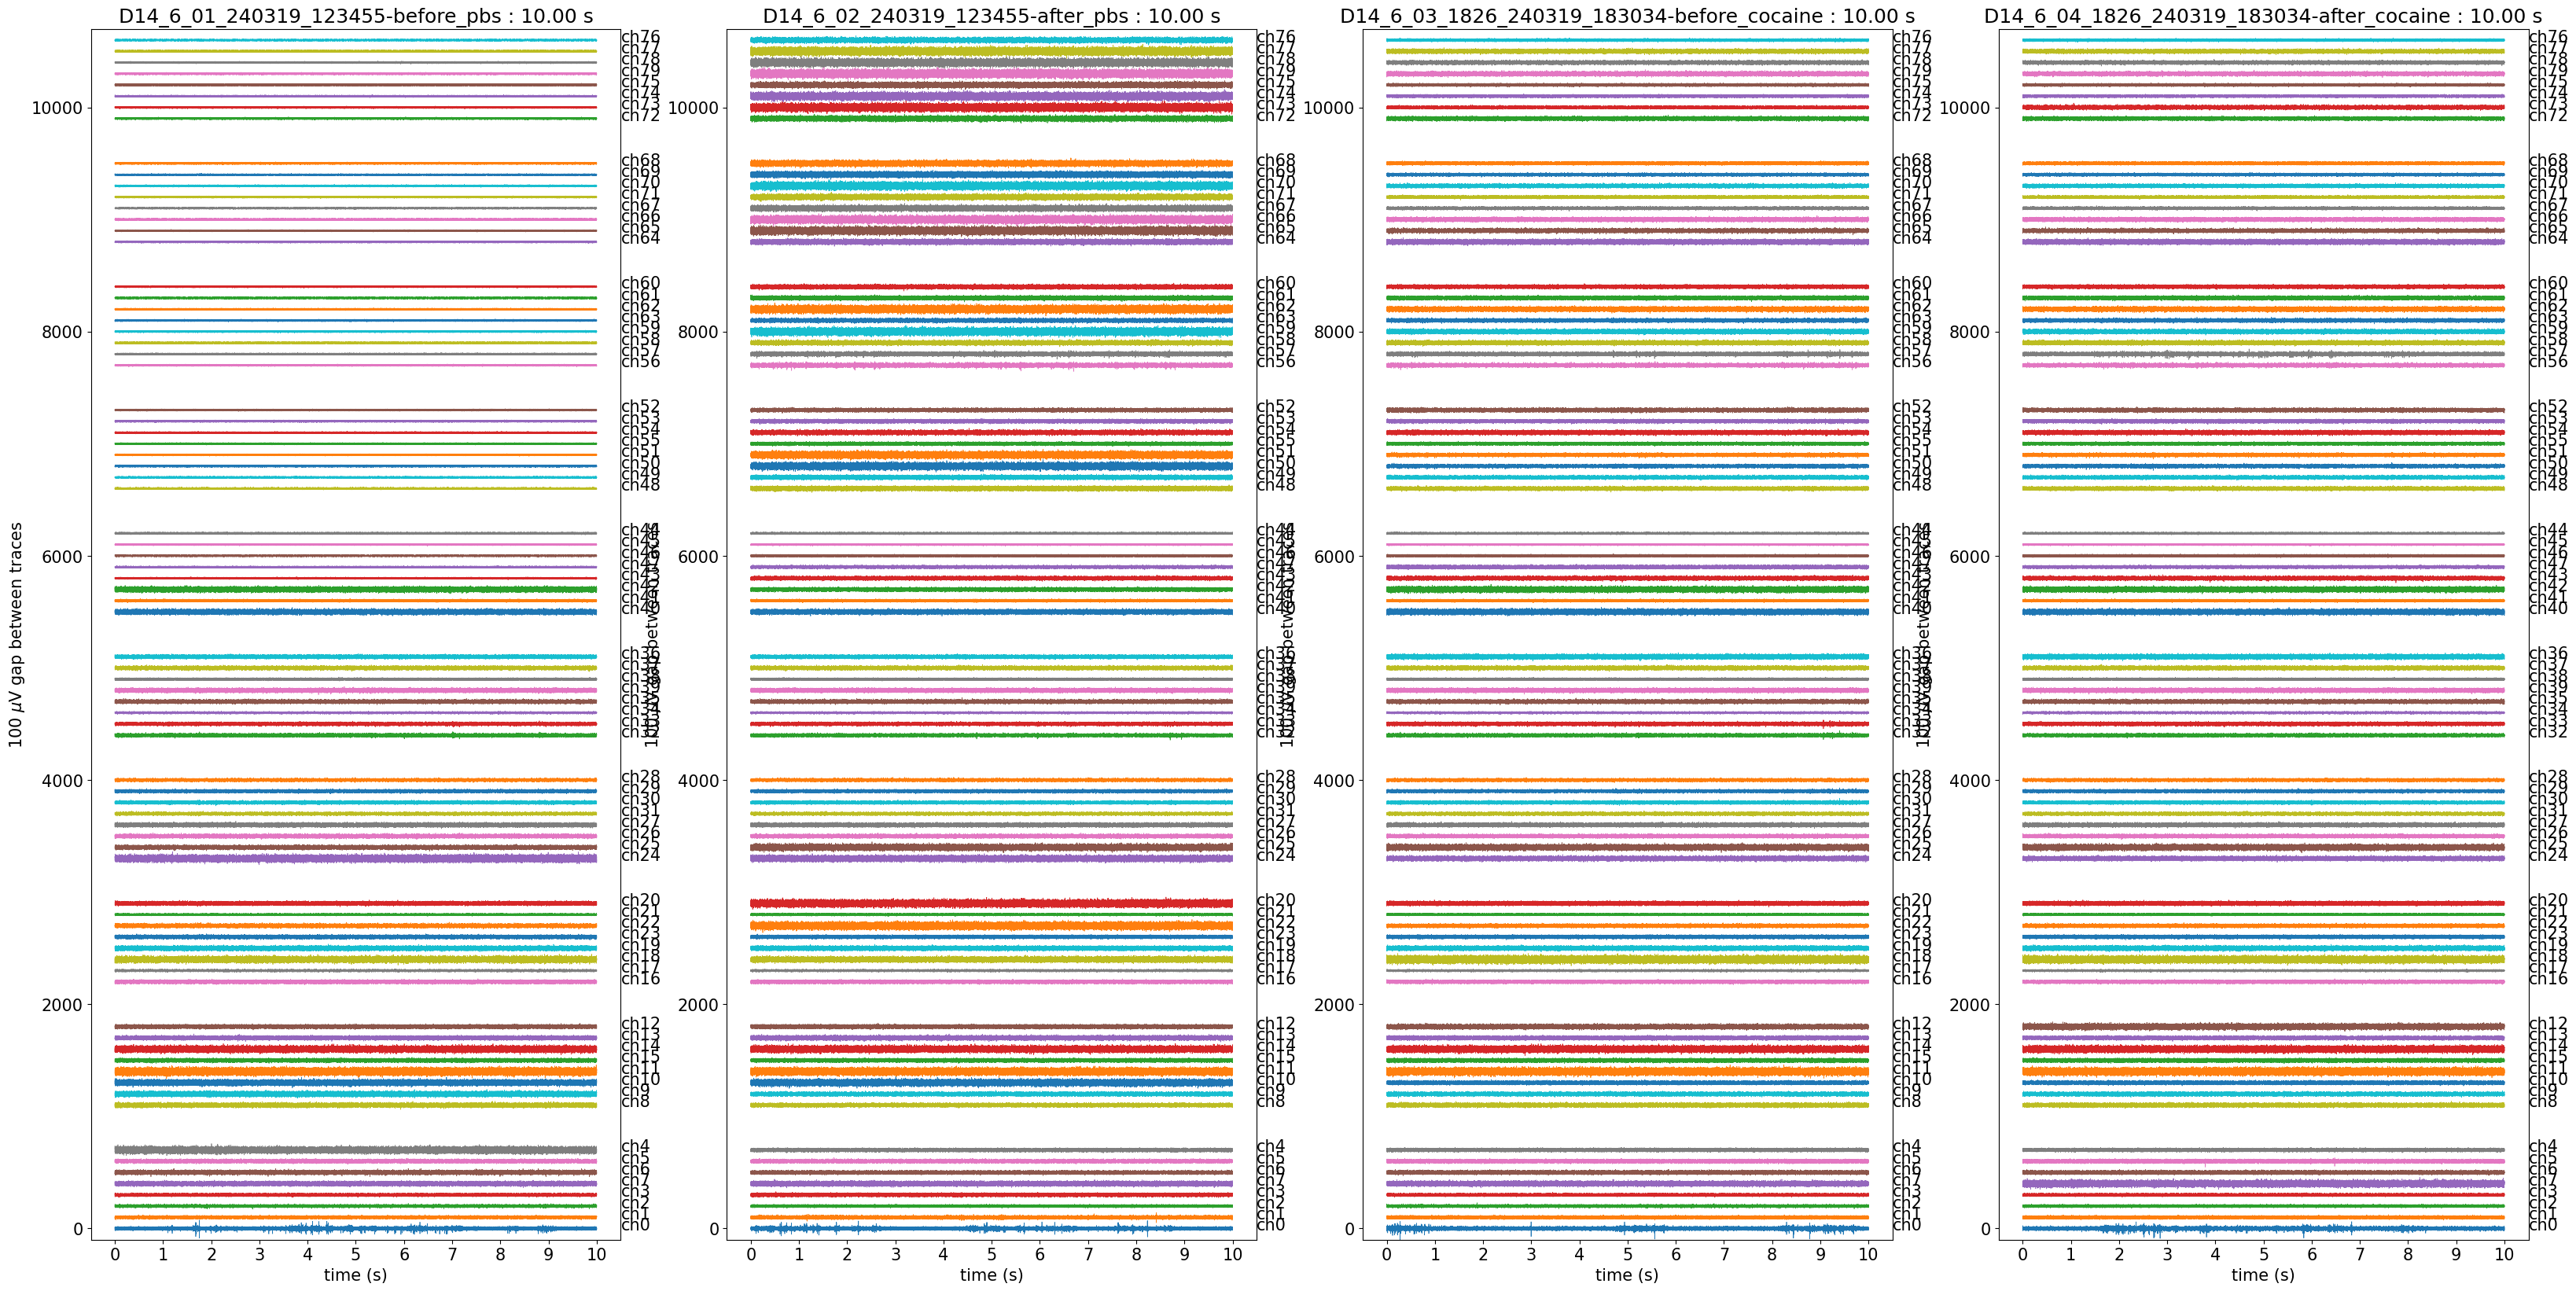

In [76]:
trace_gap = 100
shank_gap = trace_gap * 3
fontsize = 15

segments = [
    ('data/raw/240319_01_pbs_injection/D14_6_01_240319_123455-before_pbs', 6, (0, 10)),
    ('data/raw/240319_01_pbs_injection/D14_6_02_240319_123455-after_pbs', 6, (0, 10)),
    ('data/raw/240319_02_cocaine_injection/D14_6_03_1826_240319_183034-before_cocaine', 8, (0, 10)),
    ('data/raw/240319_02_cocaine_injection/D14_6_04_1826_240319_183034-after_cocaine', 2, (7, 17)),
]

plt.figure(figsize=(40, 20))
plt.rcParams.update({'font.size': 15})
for plot_index, (segment_path, file_index, (plot_start_s, plot_end_s)) in enumerate(segments):
    ax = plt.subplot(1, len(segments), plot_index + 1)
    recording_paths = sorted(glob.glob(f'{segment_path}/*.rhd'))
    print(segment_path)
    print(len(recording_paths))

    recording_path = recording_paths[file_index]
    
    raw_data, data_present = load_file(recording_path)

    if data_present:
        recording_channel_names = [channel_info['native_channel_name'] for channel_info in raw_data['amplifier_channels']]
        sampling_frequency = raw_data['frequency_parameters']['amplifier_sample_rate']
        active_channel_indices = [recording_channel_names.index(active_channel_name) for active_channel_name in active_channel_names]
        traces = raw_data['amplifier_data'][active_channel_indices]

        plotted_traces = traces[:, int(plot_start_s * sampling_frequency) : int(plot_end_s * sampling_frequency)]
        n_shank, n_channel_per_shank = channel_indices.shape
        n_channel = channel_indices.size
        duration = plotted_traces.shape[1] / sampling_frequency 
        ax.set_title(f'{segment_path.split("/")[-1]} : {duration:0.2f} s')

        for shank_i, shank in enumerate(channel_indices):
            for channel_i, channel in enumerate(shank):
                y_baseline = trace_gap * (channel_i + shank_i * n_channel_per_shank) + shank_gap * shank_i
                
                ax.plot(plotted_traces[channel]+y_baseline, linewidth=0.5)
                ax.text(len(plotted_traces[channel])+15000, y_baseline - fontsize, f'ch{channel}')

        xticks_labels = list(range(round(duration) + 1))
        xticks_locs = [minute * sampling_frequency for minute in xticks_labels]
        ax.set_ylim(-trace_gap, n_channel * trace_gap + (n_shank - 1) * shank_gap)
        ax.set_xticks(ticks=xticks_locs, labels=xticks_labels)
        ax.set_xlabel('time (s)')
        ax.set_ylabel(rf'{trace_gap} $\mu$V gap between traces')
plt.savefig('data/processed/D14_6.pdf', bbox_inches='tight')
plt.show()
plt.close()